In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()


In [6]:
res=  cg.get_coins_markets('USD',per_page=100,page=1) # max per page 250

In [56]:
df = pd.DataFrame(res)
df= df.drop(columns=['image','roi'])
df= df.iloc[:,:6]
df

,id,symbol,name,current_price,market_cap,market_cap_rank
0,bitcoin,btc,Bitcoin,41692.000,791154816562,1
1,ethereum,eth,Ethereum,2944.090,353378520931,2
2,tether,usdt,Tether,1.001,80441482657,3
3,binancecoin,bnb,BNB,398.710,67016297454,4
4,usd-coin,usdc,USD Coin,1.001,52892177470,5
...,...,...,...,...,...,...
95,frax-share,fxs,Frax Share,17.750,1022823669,96
96,bitdao,bit,BitDAO,1.140,1009914714,97
97,paxos-standard,usdp,Pax Dollar,1.000,998057093,98
98,gatechain-token,gt,GateToken,6.310,958253481,99


In [21]:
df.iloc[:,:6].to_csv('mkt_cap_3_19_22.csv')

In [50]:
df2= pd.read_excel(r'coins_mktcap_20220124.xlsx')
df2['Coin'] = df2['Coin'].str.lower()
df2.rename(columns={'#':'market_cap_rank','Coin':'symbol'},inplace=True)

In [51]:
# df['realize_cap'] = df['max_supply'] * df['current_price']

In [52]:
df2

,market_cap_rank,symbol,Price,1h,24h,7d,24h Volume,Mkt Cap
0,1,btc,"$34,007.31",1.6%,-3.8%,-21.1%,"$28,238,678,758","$643,137,853,240"
1,2,eth,"$2,241.64",1.7%,-8.6%,-33.2%,"$21,939,672,371","$266,000,721,098"
2,3,usdt,$1.01,1.4%,1.5%,1.2%,"$65,843,253,047","$79,105,940,477"
3,4,bnb,$349.26,2.0%,-7.2%,-30.0%,"$1,735,560,316","$58,263,469,200"
4,5,usdc,$1.01,0.9%,1.0%,0.6%,"$4,857,059,387","$48,357,133,041"
...,...,...,...,...,...,...,...,...
95,96,xem,$0.092075783270,2.6%,-3.3%,-23.3%,"$31,352,610","$825,464,859"
96,97,kda,$4.86,1.2%,-13.2%,-45.4%,"$30,550,001","$818,892,574"
97,98,yfi,"$22,242.34",1.7%,-6.5%,-34.0%,"$202,347,827","$790,907,495"
98,99,cusdt,$0.021950071962,1.0%,1.3%,1.2%,"$10,437,391","$785,002,435"


In [77]:
# pd.concat([df,df2],keys='symbol',axis=1)
df3= pd.merge(df,df2,how='left',on=['symbol'])
df3['chg'] = df3['market_cap_rank_y'] - df3['market_cap_rank_x']
df3

,id,symbol,name,current_price,market_cap,market_cap_rank_x,market_cap_rank_y,Price,1h,24h,7d,24h Volume,Mkt Cap,chg
0,bitcoin,btc,Bitcoin,41692.000,791154816562,1,1.0,"$34,007.31",1.6%,-3.8%,-21.1%,"$28,238,678,758","$643,137,853,240",0.0
1,ethereum,eth,Ethereum,2944.090,353378520931,2,2.0,"$2,241.64",1.7%,-8.6%,-33.2%,"$21,939,672,371","$266,000,721,098",0.0
2,tether,usdt,Tether,1.001,80441482657,3,3.0,$1.01,1.4%,1.5%,1.2%,"$65,843,253,047","$79,105,940,477",0.0
3,binancecoin,bnb,BNB,398.710,67016297454,4,4.0,$349.26,2.0%,-7.2%,-30.0%,"$1,735,560,316","$58,263,469,200",0.0
4,usd-coin,usdc,USD Coin,1.001,52892177470,5,5.0,$1.01,0.9%,1.0%,0.6%,"$4,857,059,387","$48,357,133,041",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,frax-share,fxs,Frax Share,17.750,1022823669,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,bitdao,bit,BitDAO,1.140,1009914714,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,paxos-standard,usdp,Pax Dollar,1.000,998057093,98,82.0,$1.01,0.8%,1.3%,0.9%,"$12,459,369","$1,061,672,506",-16.0
98,gatechain-token,gt,GateToken,6.310,958253481,99,89.0,$5.80,2.5%,-3.1%,-17.8%,"$7,329,547","$921,069,107",-10.0


In [74]:
df[df['symbol']=='waves']

,id,symbol,name,current_price,market_cap,market_cap_rank
42,waves,waves,Waves,33.48,3340252603,43


In [75]:
df2[df2['symbol']=='waves']

,market_cap_rank,symbol,Price,1h,24h,7d,24h Volume,Mkt Cap
99,100,waves,$7.93,1.6%,-12.1%,-44.7%,"$94,410,595","$784,603,838"


In [85]:
# df3[df3['symbol']=='waves']
df3[df3['chg'].isna()]

,id,symbol,name,current_price,market_cap,market_cap_rank_x,market_cap_rank_y,Price,1h,24h,7d,24h Volume,Mkt Cap,chg
59,xido-finance,xido,Xido Finance,72.360000,2047156635,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,apecoin,ape,ApeCoin,13.370000,1749452774,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,bittorrent,btt,BitTorrent,0.000002,1712835620,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,juno-network,juno,JUNO,36.400000,1672872613,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,humans-ai,heart,Humans.ai,0.041666,1309127902,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,havven,snx,Synthetix Network Token,5.160000,1109506972,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,frax-share,fxs,Frax Share,17.750000,1022823669,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,bitdao,bit,BitDAO,1.140000,1009914714,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,mina-protocol,mina,Mina Protocol,2.230000,940660915,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df3['chg'] =df3['chg'].replace(np.nan, 'new_entry')
df3

,id,symbol,name,current_price,market_cap,market_cap_rank_x,market_cap_rank_y,Price,1h,24h,7d,24h Volume,Mkt Cap,chg
0,bitcoin,btc,Bitcoin,41692.000,791154816562,1,1.0,"$34,007.31",1.6%,-3.8%,-21.1%,"$28,238,678,758","$643,137,853,240",0.0
1,ethereum,eth,Ethereum,2944.090,353378520931,2,2.0,"$2,241.64",1.7%,-8.6%,-33.2%,"$21,939,672,371","$266,000,721,098",0.0
2,tether,usdt,Tether,1.001,80441482657,3,3.0,$1.01,1.4%,1.5%,1.2%,"$65,843,253,047","$79,105,940,477",0.0
3,binancecoin,bnb,BNB,398.710,67016297454,4,4.0,$349.26,2.0%,-7.2%,-30.0%,"$1,735,560,316","$58,263,469,200",0.0
4,usd-coin,usdc,USD Coin,1.001,52892177470,5,5.0,$1.01,0.9%,1.0%,0.6%,"$4,857,059,387","$48,357,133,041",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,frax-share,fxs,Frax Share,17.750,1022823669,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new_entry
96,bitdao,bit,BitDAO,1.140,1009914714,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new_entry
97,paxos-standard,usdp,Pax Dollar,1.000,998057093,98,82.0,$1.01,0.8%,1.3%,0.9%,"$12,459,369","$1,061,672,506",-16.0
98,gatechain-token,gt,GateToken,6.310,958253481,99,89.0,$5.80,2.5%,-3.1%,-17.8%,"$7,329,547","$921,069,107",-10.0


In [71]:

import matplotlib.pyplot as plt

import seaborn as sns

In [77]:
((df['circulating_supply'] * df ['current_price']).astype('str'))

0          701908063350.0
1       301409542842.9816
2        78120427990.9358
3         62249374801.257
4        49799124830.7417
              ...        
245    222767712.92656523
246          220124534.96
247    212049324.18119213
248     210551028.4029988
249    210659609.48606402
Length: 250, dtype: object

In [66]:
119386664.624 * 2524.65


301409542842.9816

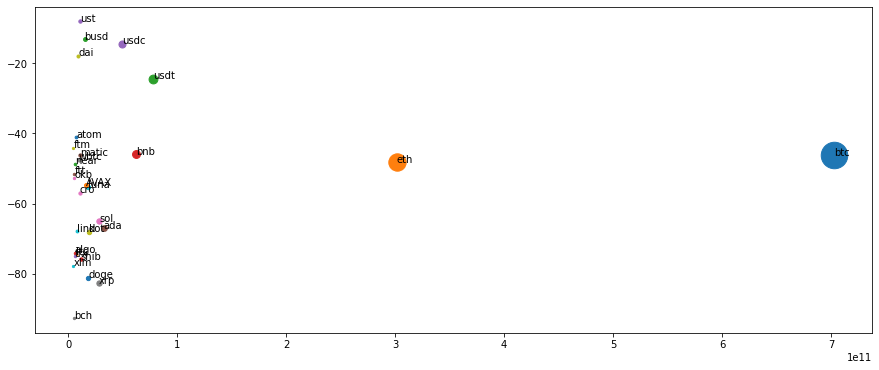

In [135]:
# df = df.drop(df[df['symbol']=='shib'].index[0]).head(15) # drop outlier
df1=  df.head(30)
o_mill =1000000000
fig, ax = plt.subplots(figsize=(15,6))
for i, j in df1.iterrows():
    ax.scatter(j.market_cap,j.ath_change_percentage,s=(j.market_cap/o_mill))
    ax.annotate(j.symbol,(j.market_cap,j.ath_change_percentage))

#     ax.scatter(j.ROE, j.PBV, s = j.MARKETCAP/100, alpha=0.5)
#     ax.annotate(j.Stocks, (j.ROE, j.PBV))

In [132]:
df1

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,...,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
0,bitcoin,btc,Bitcoin,37050.000000,702845514510,1,7.790891e+11,1.368345e+10,38300.000000,36832.000000,...,1.894489e+07,2.100000e+07,2.100000e+07,69045.000000,-46.26750,2021-11-10T14:24:11.849Z,6.781000e+01,5.461174e+04,2013-07-06T00:00:00.000Z,2022-01-31T12:29:59.293Z
1,ethereum,eth,Ethereum,2524.650000,301656333369,2,NaN,1.630234e+10,2635.190000,2499.420000,...,1.193867e+08,NaN,NaN,4878.260000,-48.20451,2021-11-10T14:24:19.604Z,4.329790e-01,5.834663e+05,2015-10-20T00:00:00.000Z,2022-01-31T12:30:08.934Z
2,tether,usdt,Tether,1.000000,78162990519,3,NaN,3.157863e+10,1.010000,0.998517,...,7.812043e+10,7.812043e+10,NaN,1.320000,-24.37848,2018-07-24T00:00:00.000Z,5.725210e-01,7.476125e+01,2015-03-02T00:00:00.000Z,2022-01-31T12:26:53.392Z
3,binancecoin,bnb,Binance Coin,370.230000,62374917469,4,6.237492e+10,9.799039e+08,386.450000,367.090000,...,1.681370e+08,1.681370e+08,1.681370e+08,686.310000,-45.94593,2021-05-10T07:24:17.097Z,3.981770e-02,9.315879e+05,2017-10-19T00:00:00.000Z,2022-01-31T12:28:56.750Z
4,usd-coin,usdc,USD Coin,1.000000,49866791355,5,NaN,2.115350e+09,1.010000,0.997846,...,4.979912e+10,4.978951e+10,NaN,1.170000,-14.40847,2019-05-08T00:40:28.300Z,8.918480e-01,1.254577e+01,2021-05-19T13:14:05.611Z,2022-01-31T12:29:54.017Z
5,cardano,ada,Cardano,1.020000,32698242743,6,4.588670e+10,7.058557e+08,1.070000,1.010000,...,3.206639e+10,4.500000e+10,4.500000e+10,3.090000,-66.96683,2021-09-02T06:00:10.474Z,1.925275e-02,5.196410e+03,2020-03-13T02:22:55.044Z,2022-01-31T12:28:48.579Z
6,solana,sol,Solana,91.060000,28644413805,7,NaN,1.000606e+09,96.470000,89.790000,...,3.150999e+08,5.081810e+08,NaN,259.960000,-65.02746,2021-11-06T21:54:35.825Z,5.008010e-01,1.805378e+04,2020-05-11T19:35:23.449Z,2022-01-31T12:29:42.594Z
7,ripple,xrp,XRP,0.585820,27995574705,8,5.864554e+10,2.309728e+09,0.621531,0.583522,...,4.773692e+10,1.000000e+11,1.000000e+11,3.400000,-82.74344,2018-01-07T00:00:00.000Z,2.686210e-03,2.173210e+04,2014-05-22T00:00:00.000Z,2022-01-31T12:29:17.243Z
8,polkadot,dot,Polkadot,17.600000,18986381551,9,NaN,6.809456e+08,18.930000,17.250000,...,1.079132e+09,1.160081e+09,NaN,54.980000,-68.01569,2021-11-04T14:10:09.301Z,2.700000e+00,5.519205e+02,2020-08-20T05:48:11.359Z,2022-01-31T12:28:52.638Z
9,terra-luna,luna,Terra,46.140000,18454082546,10,4.605903e+10,1.847709e+09,50.130000,43.670000,...,4.006615e+08,8.182602e+08,1.000000e+09,103.340000,-55.36290,2021-12-27T02:13:02.051Z,1.217980e-01,3.777132e+04,2020-03-18T17:03:01.083Z,2022-01-31T12:28:55.402Z


In [136]:
cg.get_coin_market_chart_range_by_id()

TypeError: get_coin_market_chart_range_by_id() missing 4 required positional arguments: 'id', 'vs_currency', 'from_timestamp', and 'to_timestamp'

In [139]:
res2= cg.get_coins_categories_list()
df_cat = pd.DataFrame(res2)

In [140]:
df_cat

,category_id,name
0,aave-tokens,Aave Tokens
1,analytics,Analytics
2,arbitrum-ecosystem,Arbitrum Ecosystem
3,artificial-intelligence,Artificial Intelligence
4,asset-backed-tokens,Asset-backed Tokens
...,...,...
125,wrapped-tokens,Wrapped-Tokens
126,yearn-yfi-partnerships-mergers,Yearn Ecosystem
127,yield-aggregator,Yield Aggregator
128,yield-farming,Yield Farming


In [142]:
res3 = cg.get_exchanges_list()
df_ex =pd.DataFrame(res3)

In [148]:
df_ex = df_ex.drop(columns=['image','description'])

In [149]:
df_ex

,id,name,year_established,country,url,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,https://www.binance.com/,False,10,1,279138.164803,279138.164803
1,okex,OKX,2013.0,Belize,https://www.okx.com,False,10,2,96527.762039,96527.762039
2,gdax,Coinbase Exchange,2012.0,United States,https://www.coinbase.com,False,10,3,65220.190331,65220.190331
3,crypto_com,Crypto.com Exchange,2019.0,Cayman Islands,https://crypto.com/exchange,False,10,4,62061.263576,62061.263576
4,kucoin,KuCoin,2014.0,Seychelles,https://www.kucoin.com/,False,10,5,43748.839601,43748.839601
...,...,...,...,...,...,...,...,...,...,...
95,tokpie,Tokpie,2018.0,Hong Kong,https://tokpie.io/,False,6,96,2942.209815,2759.117633
96,biswap,Biswap,NaN,None,https://biswap.org/,False,5,97,1954.959734,1954.959734
97,bitexen,Bitexen,2018.0,None,https://www.bitexen.com/,False,6,98,1920.765514,1920.765514
98,osmosis,Osmosis,2021.0,None,https://app.osmosis.zone/,False,6,99,1818.216374,1818.216374


In [177]:
res3 = cg.get_finance_platforms()
df_platform  = pd.DataFrame(res3)

In [178]:
df_platform

,name,facts,category,centralized,website_url
0,Binance Staking,,CeFi Platform,True,https://www.binance.com/en/staking
1,Celsius Network,,CeFi Platform,True,https://celsius.network/
2,Cobo,,CeFi Platform,True,https://cobo.com/
3,Dai Savings Rate,,DeFi Platform,False,https://oasis.app/save
4,dYdX,,DeFi Platform,False,https://dydx.exchange/
5,Idle Finance,,DeFi Platform,False,https://idle.finance/#/
6,Staked US,,CeFi Platform,True,https://staked.us/
7,Crypto.com,,CeFi Platform,True,https://crypto.com/en/
8,Aave,,DeFi Platform,False,https://aave.com/
9,Nexo,,CeFi Platform,True,https://nexo.io/


In [180]:
res4=  cg.get_finance_products()
df_product = pd.DataFrame(res4)

In [181]:
df_product

,platform,identifier,supply_rate_percentage,borrow_rate_percentage,number_duration,length_duration,start_at,end_at,value_at,redeem_at
0,Staked US,Keep,3.4,None,None,None,0,0,0,0
1,Binance Savings,XTZ001,1.956035,None,None,None,0,0,0,0
2,Binance Savings,ARK001,1.0001,None,None,None,0,0,0,0
3,Hodlnaut,DAI,8.0,None,None,None,0,0,0,0
4,Staked US,V-Systems,17.8,None,None,None,0,0,0,0
5,Binance Savings,ZEC001,0.182865,None,None,None,0,0,0,0
6,Binance Savings,UNI001,1.0001,None,None,None,0,0,0,0
7,Swissborg,BTC,0.89598513408365,None,None,None,0,0,0,0
8,Binance Staking,XLM,3.0,None,None,None,1543622400,1572220800,0,0
9,Fulcrum,dai,4.9428249105223,None,None,None,0,0,0,0


In [184]:
df_deri = pd.DataFrame(cg.get_derivatives())

In [185]:
df_deri

,market,symbol,index_id,price,price_percentage_change_24h,contract_type,index,basis,spread,funding_rate,open_interest,volume_24h,last_traded_at,expired_at
0,Binance (Futures),BTCUSDT,BTC,37043.25,-2.450585,perpetual,36954.896155,0.034638,0.01,-0.000792,2.894301e+09,8.898406e+09,1643634427,NaN
1,Bitget Futures,ADAUSDT_UMCBL,USDT,1.02,-3.505444,perpetual,1.018520,0.110085,0.01,0.010000,2.342887e+09,8.990866e+06,1643634643,NaN
2,FTX (Derivatives),BTC-PERP,BTC,37022.0,-2.329508,perpetual,37013.723850,-0.022355,0.01,-0.012000,1.512158e+09,2.192584e+09,1643634736,NaN
3,Prime XBT,BTC/USD,BTC,36902.1,-2.645311,perpetual,NaN,0.000000,0.03,0.000000,1.424189e+09,1.654536e+08,1643634546,NaN
4,Binance (Futures),ETHUSDT,ETH,2533.89,-3.201995,perpetual,2528.407204,0.056875,0.02,-0.012546,1.304316e+09,4.094349e+09,1643634427,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,Bakkt,6838396,BTC,None,0.000000,futures,NaN,0.000000,NaN,0.000000,NaN,0.000000e+00,1643586279,NaN
2282,Bakkt,6684391,BTC,None,0.000000,futures,NaN,0.000000,NaN,0.000000,NaN,0.000000e+00,1643586279,NaN
2283,Bakkt,6729583,BTC,None,0.000000,futures,NaN,0.000000,NaN,0.000000,NaN,0.000000e+00,1643588079,NaN
2284,Bakkt,6920503,BTC,None,0.000000,futures,NaN,0.000000,NaN,0.000000,NaN,0.000000e+00,1643588079,NaN


In [192]:
res5= cg.get_coin_history_by_id(id='bitcoin',date='31-12-2021')

In [200]:
res5['market_data']

{'current_price': {'aed': 173335.35506093345,
  'ars': 4845278.79213476,
  'aud': 65099.95545520548,
  'bch': 109.44728220346019,
  'bdt': 4049845.3153285575,
  'bhd': 17792.042260995364,
  'bmd': 47191.86838983951,
  'bnb': 91.05098177637761,
  'brl': 262938.93310766906,
  'btc': 1.0,
  'cad': 60146.13064658725,
  'chf': 43123.50460781983,
  'clp': 40185745.67577394,
  'cny': 300758.49643528607,
  'czk': 1036036.0738781514,
  'dkk': 309942.0340239494,
  'dot': 1713.8837327212354,
  'eos': 15337.255014125487,
  'eth': 12.704778851339436,
  'eur': 41672.35465483228,
  'gbp': 34963.08672584881,
  'hkd': 367999.83011054865,
  'huf': 15383133.33903599,
  'idr': 673246273.2297093,
  'ils': 146564.25757700833,
  'inr': 3512558.6733543687,
  'jpy': 5429518.8419878185,
  'krw': 56156434.81252792,
  'kwd': 14276.578409031064,
  'lkr': 9576628.863277515,
  'ltc': 318.79912512090596,
  'mmk': 83929776.5385867,
  'mxn': 965697.6322642005,
  'myr': 196978.85865919007,
  'ngn': 19403807.04811128,
  

In [304]:
df.head()

,total_volumes
ts,
1612137600000,4.248865e+10
1612224000000,4.926886e+10
1612310400000,5.073070e+10
1612396800000,4.976214e+10
1612483200000,5.449481e+10


In [325]:
def history_market(symbol_name= 'bitcoin',vs='usd',from_timestamp=1612074109,to_timestamp=1643610109):
    res= cg.get_coin_market_chart_range_by_id(id=symbol_name,vs_currency=vs,from_timestamp=from_timestamp,to_timestamp=to_timestamp
    )
    df_all = pd.DataFrame()
    for i in res6:
        df_sym  =pd.DataFrame(res[i],columns=['ts',i]).set_index('ts')
        df_all = pd.concat([df_all,df_sym],axis=1)
    df_all = df_all.reset_index()
#     print(df_all)
    df_all['date'] =df_all['ts'].apply(lambda x:pd.to_datetime(x,unit='ms'))
    df_all = df_all.set_index('date')
    df_all  =  df_all.drop(columns='ts')
    return df_all

In [531]:
eth = history_market('ethereum')#.reset_index()
btc = history_market('bitcoin')#.reset_index()
spell = history_market('spell-token')#.reset_index()
sol = history_market('solana')#.reset_index()
luna = history_market('terra-luna')#.reset_index()
avax = history_market('avalanche-2')#.reset_index()
# shib = history_market('shiba-inu')#.reset_index()

df_list=[btc,eth,spell,sol,luna,avax]
sym_list= ['btc','eth','spell','sol','luna','avax']
dict_df = dict(zip(sym_list,df_list))
# Clear list








#     price= df_['prices']
#     price.name = sym
#     list_df2.append(price)
# #     df_c[sym] =price
#     df_c = df_c.append(price).T

,prices,market_caps,total_volumes
date,,,
2021-02-01,13.469298,1.036012e+09,3.029140e+08
2021-02-02,13.181408,1.011744e+09,1.330156e+08
2021-02-03,13.504583,1.045592e+09,8.069360e+07
2021-02-04,14.864358,1.141561e+09,1.207419e+08
2021-02-05,15.317957,1.173420e+09,1.587459e+08
...,...,...,...
2022-01-27,66.139206,1.632735e+10,1.134178e+09
2022-01-28,64.837427,1.580136e+10,8.727275e+08
2022-01-29,67.211514,1.645838e+10,6.294576e+08


In [597]:

df_list = []
mkt_list = []
df_2 = pd.DataFrame()
for sym,df_ in dict_df.items():
    price = df_['prices']
    price.name = sym
    mkt_cap = df_['market_caps']
    mkt_cap.name  = sym+'_mkt_cap'
    df_2  = pd.concat([df_2,price,mkt_cap],axis=1)
#     df_2 = df_2.append(price).append(mkt_cap).T
#     df_2= df_2.append(price).T
#     df_2 = df_2.append(mkt_cap).T

In [613]:
df_2.columns.str.contains('mkt_cap')

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True])

In [619]:
df_2[sym_list]

,btc,eth,spell,sol,luna,avax
2021-02-01,33064.786767,1317.047436,NaN,4.263969,1.465018,13.469298
2021-02-02,33405.990357,1368.664455,NaN,4.594575,1.788472,13.181408
2021-02-03,35485.985934,1514.225196,NaN,5.257321,2.316992,13.504583
2021-02-04,37494.717625,1661.000824,NaN,5.721471,2.117743,14.864358
2021-02-05,36816.508082,1587.800899,NaN,6.416247,2.645128,15.317957
...,...,...,...,...,...,...
2022-01-27,36870.440167,2470.430412,0.007837,92.248013,58.919572,66.139206
2022-01-28,37276.839558,2411.863855,0.005151,89.601586,54.257394,64.837427
2022-01-29,37852.579028,2551.111074,0.005466,91.425803,50.662323,67.211514
2022-01-30,38232.178732,2603.603872,0.007188,96.178691,50.880680,72.248592


In [621]:
pd.options.plotting.backend = "plotly"
ret_df =df_2[sym_list]
all_ret = (ret_df.pct_change()+1).cumprod()-1
all_ret.plot()

In [546]:
for i in (pd.options.plotting):
    print(i)

TypeError: 'DictWrapper' object is not iterable

In [449]:
# df_c = pd.concat([btc,eth],axis=1,keys=['btc','eth'])
# df_c = pd.merge(btc,eth,left_on='date', right_on='date', how='outer',suffixes=['_btc','_eth'])
# df_c

#     df_c = df.merge(df_,on='date',how='left')

In [450]:
df

,btc,eth,spell
date,,,
2021-02-01,33064.786767,1317.047436,NaN
2021-02-02,33405.990357,1368.664455,NaN
2021-02-03,35485.985934,1514.225196,NaN
2021-02-04,37494.717625,1661.000824,NaN
2021-02-05,36816.508082,1587.800899,NaN
...,...,...,...
2022-01-27,36870.440167,2470.430412,0.007837
2022-01-28,37276.839558,2411.863855,0.005151
2022-01-29,37852.579028,2551.111074,0.005466


In [404]:
pd.merge([spell,btc,eth],how='right')

TypeError: merge() missing 1 required positional argument: 'right'

,date,prices,market_caps,total_volumes
0,2021-05-28,0.001048,1.489184e+07,5.198165e+07
1,2021-05-29,0.001048,1.489184e+07,5.198165e+07
2,2021-05-30,0.001247,1.834433e+07,7.182066e+06
3,2021-05-31,0.001578,2.272604e+07,7.990687e+06
4,2021-06-01,0.001421,2.137369e+07,1.111852e+07
...,...,...,...,...
244,2022-01-27,0.007837,6.339299e+08,1.466891e+08
245,2022-01-28,0.005151,4.134195e+08,3.787275e+08
246,2022-01-29,0.005466,4.442685e+08,1.094536e+08
247,2022-01-30,0.007188,5.830124e+08,2.355636e+08


In [332]:
df[df['symbol']=='spell']

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,...,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
130,spell-token,spell,Spell Token,0.007263,592415484,131,1.525608e+09,190596558.0,0.008028,0.006451,...,8.154601e+10,1.960087e+11,2.100000e+11,0.035064,-79.81545,2021-11-02T08:44:42.429Z,0.000298,2273.98383,2021-08-05T13:00:27.077Z,2022-01-31T14:00:06.412Z


Timestamp('2021-02-01 00:00:00')